In [48]:
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144
import pandas as pd
import numpy as np
import requests as req
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook
output_notebook()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Loading BokehJS ...

In [62]:
solar = pd.read_csv('openpv_all.csv', parse_dates=[1], infer_datetime_format=True)

In [53]:
names = [col for col in solar]
solar.dtypes

state                                  object
date_installed                 datetime64[ns]
incentive_prog_names                   object
type                                   object
size_kw                               float64
appraised                              object
zipcode                               float64
install_type                           object
installer                              object
cost_per_watt                         float64
cost                                  float64
lbnl_tts_version_year                 float64
lbnl_tts                               object
city                                   object
utility_clean                          object
tech_1                                 object
model1_clean                           object
county                                 object
annual_PV_prod                        float64
annual_insolation                     float64
rebate                                 object
sales_tax_cost                    

In [40]:
pd.unique(solar['install_type'])

array(['residential', 'Educational', 'Residential', 'Commercial',
       'Nonprofit', 'commercial', 'government', 'Unknown', 'Utility',
       'Agricultural', 'Government', 'educational', nan, 'utility',
       'agricultural', 'nonprofit', 'unknown', 'Customer', 'education',
       'Municipal', 'agriculture', 'public', 'Institutional', 'Public',
       'Commercial - Other', "Gov't/NP", 'Residential/SF',
       'Nonresidential', 'Commercial - Builders', 'Commerical',
       'Commercial - Agriculture', 'Small Business',
       'Commercial - Small Business', 'Not Stated'], dtype=object)

In [63]:
solar2 = solar

In [64]:
solar2['install_type']= solar2['install_type'].str.replace('Agricultural|agricultural|agriculture|Commercial - Agriculture', 'agriculture')
solar2['install_type']= solar2['install_type'].str.replace('residential|Residential|Residential/SF|residential/SF','residential')
solar2['install_type']= solar2['install_type'].str.replace('Commercial|commercial|Commercial - Other|Commerical|Small Business|Commercial - Small Business|commercial - Other|commercial - Builders|commercial - commercial', 'commercial') 
solar2['install_type']= solar2['install_type'].str.replace('Educational|educational|education', 'educational') 
solar2['install_type']= solar2['install_type'].str.replace('Nonprofit|government|Government|nonprofit|Municipal|public|Institutional|Public|Gov\'t/NP','institutional')
solar2['install_type']= solar2['install_type'].str.replace('Utility|utility','utility') 
solar2['install_type']= solar2['install_type'].str.replace('Unknown|unknown|  |Customer|Nonresidential|Not Stated','unknown')

In [7]:
pd.unique(solar2['install_type'])

array(['residential', 'educational', 'commercial', 'institutional',
       'unknown', 'utility', 'agriculture', nan, 'commercial - Other',
       'residential/SF', 'commercial - Builders',
       'commercial - commercial'], dtype=object)

In [65]:
solar_state = solar2.groupby('state')
totalpv = pd.DataFrame(solar_state['size_kw'].sum())
totalpv = totalpv.sort_values('size_kw', ascending=False).head()
totalpv

,size_kw
state,
CA,7378789.585
NJ,2283736.896
MA,1941267.801
AZ,1647162.639
NY,575229.051


In [66]:
solar_date = solar2.groupby([solar2['date_installed'].dt.year])
totals = pd.DataFrame(solar_date['size_kw'].sum())
recenttotals = totals[1995:2015]
recenttotals

,size_kw
date_installed,
1995.000,145.350
1996.000,726.883
1997.000,2864.283
1998.000,669.379
1999.000,9024.500
2000.000,2532.036
2001.000,12799.198
2002.000,32675.945
2003.000,51042.800


In [59]:
solar2.isnull().sum().head(20)

state                         0
date_installed                5
incentive_prog_names     222487
type                          5
size_kw                       5
appraised                796409
zipcode                       5
install_type              42581
installer                318020
cost_per_watt            257572
cost                     257411
lbnl_tts_version_year    222487
lbnl_tts                 222487
city                     221567
utility_clean            227725
tech_1                   439526
model1_clean             439526
county                    21793
annual_PV_prod           239476
annual_insolation        239476
dtype: int64

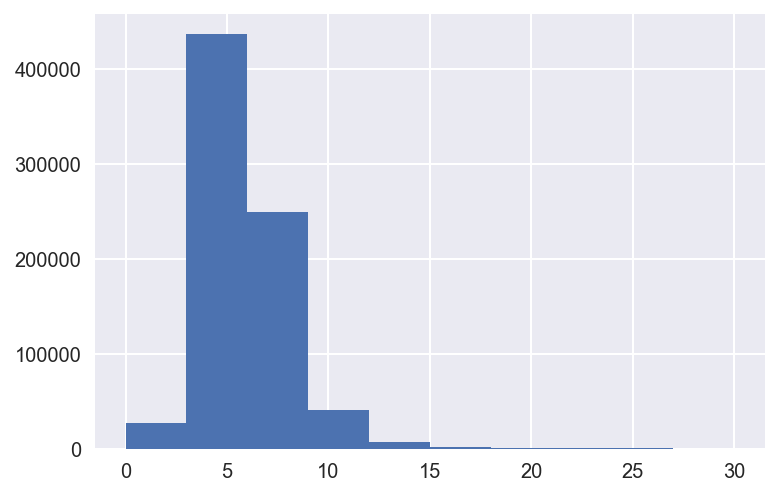

In [50]:
solar2['cost_per_watt'].hist()

In [61]:
source = ColumnDataSource(recenttotals)
a = figure(plot_width=800, plot_height=400)
a.line(x='date_installed', y='size_kw', source=source)
show(a)

In [19]:
dsireurl = "http://programs.dsireusa.org/api/v1/getprograms/json"
dsirejson = requests.get(dsireurl).json()

In [26]:
list(dsirejson.keys())

[u'recordsTotal', u'recordsFiltered', u'draw', u'meta', u'data']

In [29]:
dsiredict = dsirejson['data']

In [31]:
incdf = pd.DataFrame(dsiredict)
incdf

,Administrator,Authorities,Budget,CategoryId,CategoryName,Cities,Code,Contacts,Counties,Details,...,Sectors,StartDate,State,Summary,Technologies,TypeId,TypeName,Utilities,WebsiteUrl,ZipCodes
0,None,[{u'website': u'http://www.legis.nd.gov/cencod...,None,2,Regulatory Policy,[],ND02R,"[{u'program': 1, u'webVisible': False, u'conta...",[],[],...,"[{u'name': u'Commercial', u'id': 1, u'countChi...",,North Dakota,<p>&#10;&#9;North Dakota's solar easement law ...,"[{u'category': u'Solar Technologies', u'energy...",44,Solar/Wind Access Policy,[],,[]
1,,[{u'website': u'http://www.azleg.gov/viewdocum...,,1,Financial Incentive,[],AZ10F,"[{u'program': 2, u'webVisible': False, u'conta...",[],"[{u'templateId': 77, u'displayOrder': 0, u'id'...",...,"[{u'name': u'Residential', u'id': 9, u'countCh...",01/01/1994,Arizona,<div>&#10;&#9;This incentive allows Arizona ta...,"[{u'category': u'Biomass', u'energyCategoryId'...",32,Personal Tax Deduction,[],,[]
2,None,[{u'website': u'http://mgaleg.maryland.gov/web...,None,2,Regulatory Policy,[],MD01R,"[{u'program': 3, u'webVisible': True, u'contac...",[],[],...,"[{u'name': u'Commercial', u'id': 1, u'countChi...",,Maryland,<p>\r\n\tMaryland has a long-standing law prot...,"[{u'category': u'Solar Technologies', u'energy...",44,Solar/Wind Access Policy,[],,[]
3,None,[{u'website': u'https://www.oregonlegislature....,None,2,Regulatory Policy,[],OR02R,[],[],[],...,"[{u'name': u'Commercial', u'id': 1, u'countChi...",,Oregon,<p>\r\n\tOregon has several laws that protect ...,"[{u'category': u'Solar Technologies', u'energy...",44,Solar/Wind Access Policy,[],,[]
4,None,[{u'website': u'http://www.legis.state.ak.us/b...,None,2,Regulatory Policy,[],AK01R,"[{u'program': 6, u'webVisible': True, u'contac...",[],[],...,"[{u'name': u'Commercial', u'id': 1, u'countChi...",,Alaska,<p>\r\n\tAlaska&#39;s solar easement provision...,"[{u'category': u'Solar Technologies', u'energy...",44,Solar/Wind Access Policy,[],,[]
5,None,[{u'website': u'http://legislature.idaho.gov/i...,None,2,Regulatory Policy,[],ID02R,"[{u'program': 7, u'webVisible': False, u'conta...",[],[],...,"[{u'name': u'Commercial', u'id': 1, u'countChi...",,Idaho,"<p>Similar to laws in other states, Idaho's s...","[{u'category': u'Solar Technologies', u'energy...",44,Solar/Wind Access Policy,[],,[]
6,None,[{u'website': u'http://kslegislature.org/li/st...,None,2,Regulatory Policy,[],KS01R,"[{u'program': 8, u'webVisible': False, u'conta...",[],[],...,"[{u'name': u'Commercial', u'id': 1, u'countChi...",,Kansas,<p><span>Parties may voluntarily enter into so...,"[{u'category': u'Solar Technologies', u'energy...",44,Solar/Wind Access Policy,[],,[]
7,None,[{u'website': u'http://www.lexisnexis.com/hott...,None,2,Regulatory Policy,[],GA01R,"[{u'program': 10, u'webVisible': True, u'conta...",[],[],...,"[{u'name': u'Commercial', u'id': 1, u'countChi...",,Georgia,<p>&#10;&#9;In determining that the use of sol...,"[{u'category': u'Solar Technologies', u'energy...",44,Solar/Wind Access Policy,[],,[]
8,None,[{u'website': u'http://www.lrc.state.ky.us/KRS...,None,2,Regulatory Policy,[],KY01R,"[{u'program': 11, u'webVisible': True, u'conta...",[],[],...,"[{u'name': u'Commercial', u'id': 1, u'countChi...",,Kentucky,"<p>\r\n\tIn Kentucky, solar easements may be o...","[{u'category': u'Solar Technologies', u'energy...",44,Solar/Wind Access Policy,[],,[]
9,None,[{u'website': u'http://janus.state.me.us/legis...,None,2,Regulatory Policy,[],ME03R,"[{u'program': 12, u'webVisible': False, u'cont...",[],[],...,"[{u'name': u'Commercial', u'id': 1, u'countChi...",,Maine,<p>&#10;&#9;Maine allows for the creation of e...,"[{u'category': u'Solar Technologies', u'energy...",44,Solar/Wind Access Policy,[],,[]
